### 데이터 불러오기 및 분석하기
* 데이터 크기
* 데이터의 개수
* 각 리뷰의 문자 길이 분포
* 많이 사용된 단어
* 긍, 부정 데이터의 분포
* 각 리뷰의 단어 개수 분포
* 특수문자 및 대, 소문자 비율

In [1]:
import zipfile

In [2]:
DATA_IN_PATH = './data_in/'

In [3]:
file_list = ['labeledTrainData.tsv.zip', 'unlabeledTrainData.tsv.zip', 'testData.tsv.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_data = pd.read_csv(DATA_IN_PATH+"labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


### 데이터 크기 분석

In [6]:
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'tsv' in file and 'zip' not in file:
        print(file.ljust(30)+str(round(os.path.getsize(DATA_IN_PATH+file)/1000000, 2))+'MB')

파일 크기 : 
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB
unlabeledTrainData.tsv        67.28MB


### 데이터 개수

In [7]:
print('전체 학습 데이터의 개수 :{}'.format(len(train_data)))

전체 학습 데이터의 개수 :25000


### 각 리뷰의 문자 길이 분포

In [8]:
train_length = train_data['review'].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

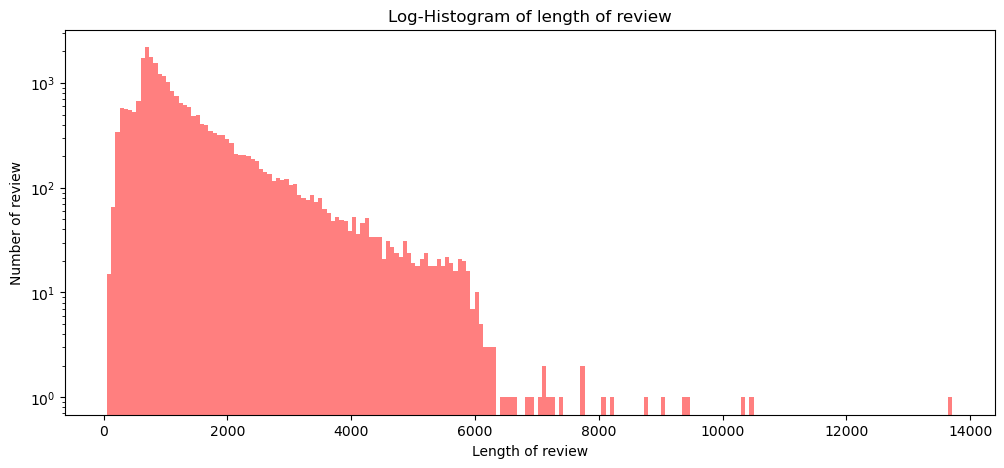

In [9]:
plt.figure(figsize=(12,5))
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonpositive='clip')

plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')

plt.ylabel('Number of review')

### 길이 관련 통계값 추출

In [10]:
print('리뷰 길이 최대 값: {}'.format(np.max(train_length)))
print('리뷰 길이 최소 값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최대 값: 13710
리뷰 길이 최소 값: 54
리뷰 길이 평균 값: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 중간값: 983.0
리뷰 길이 제1사분위: 705.0
리뷰 길이 제3사분위: 1619.0


{'whiskers': [<matplotlib.lines.Line2D at 0x2798a9536d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2798a953c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2798a953400>],
 'medians': [<matplotlib.lines.Line2D at 0x2798a97c250>],
 'fliers': [<matplotlib.lines.Line2D at 0x2798a97c7f0>],
 'means': [<matplotlib.lines.Line2D at 0x2798a97c520>]}

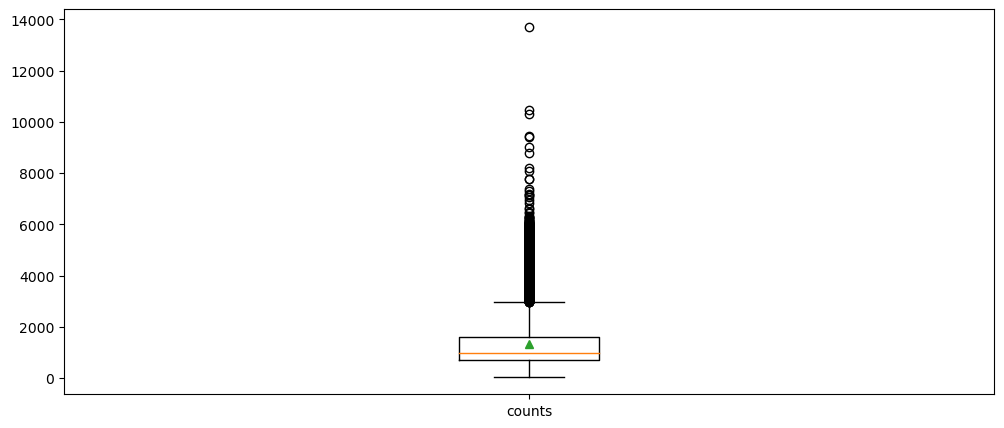

In [11]:
# showmeans=True : 평균표시
plt.figure(figsize=(12,5))
plt.boxplot(train_length, labels=['counts'], showmeans=True)

### 워드 클라우드

(-0.5, 799.5, 599.5, -0.5)

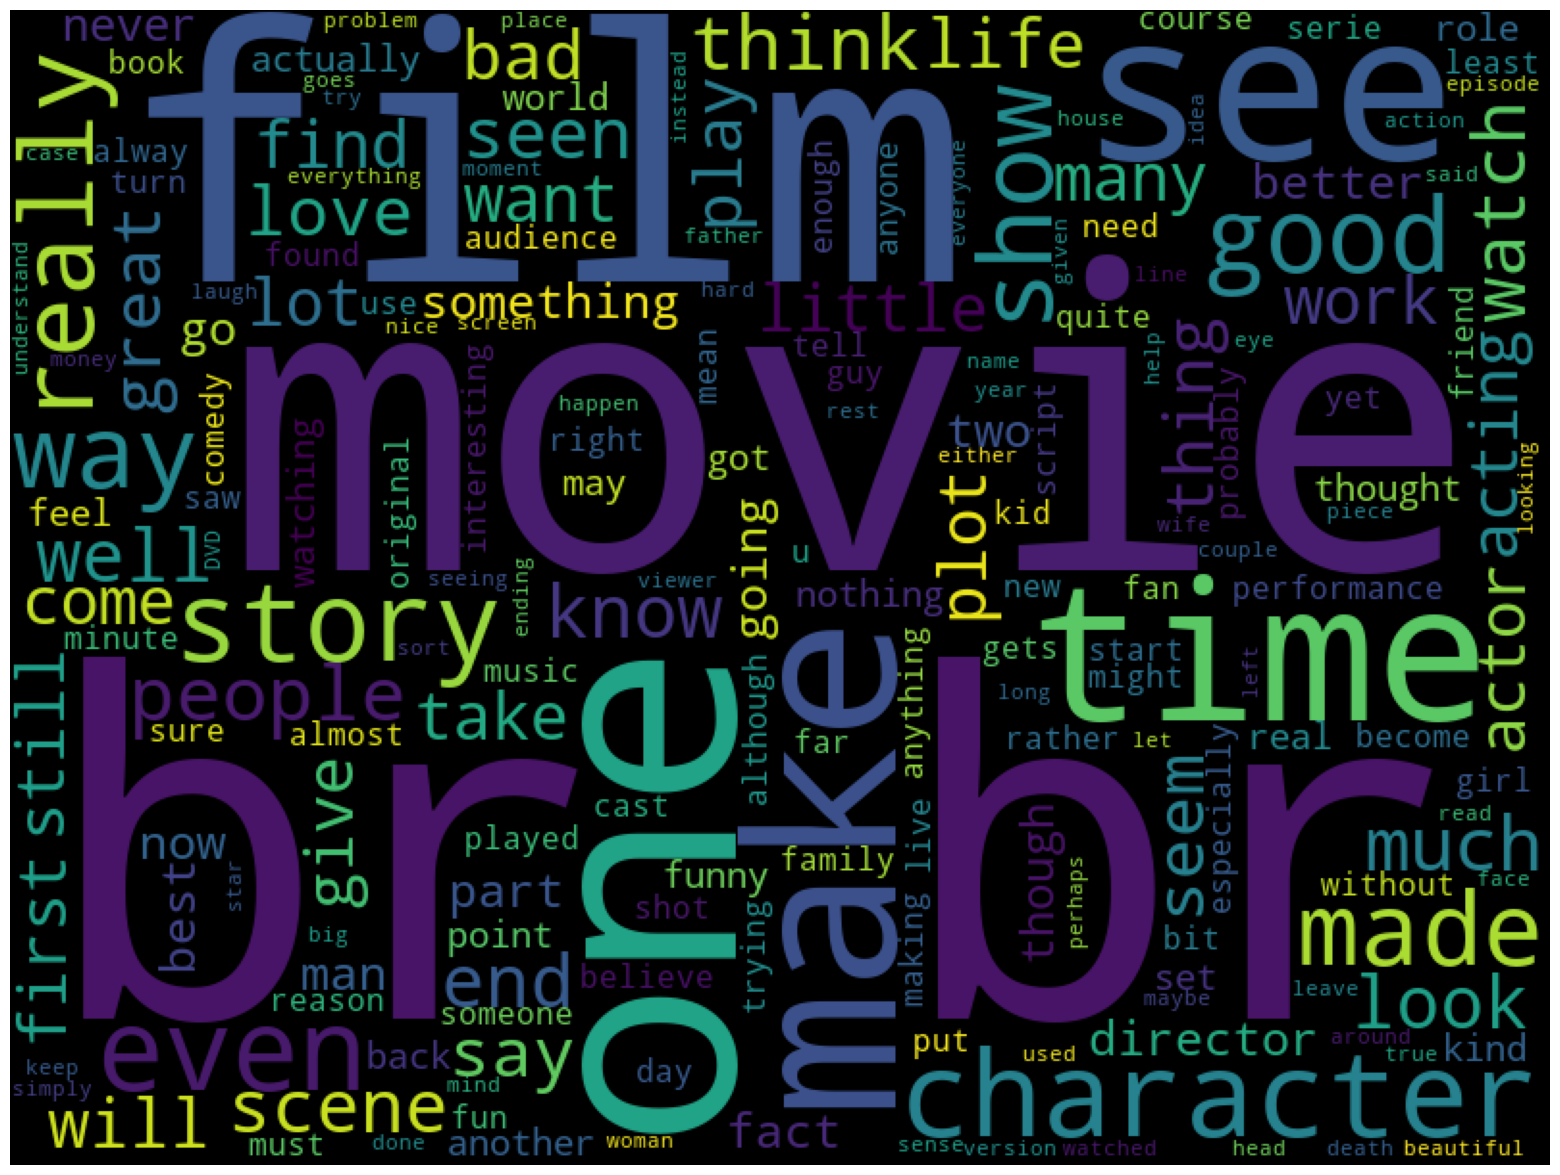

In [12]:
from wordcloud import WordCloud

cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

### 긍정/부정 데이터 분포

In [13]:
train_data['sentiment']


0        1
1        1
2        0
3        0
4        1
        ..
24995    0
24996    0
24997    0
24998    0
24999    1
Name: sentiment, Length: 25000, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

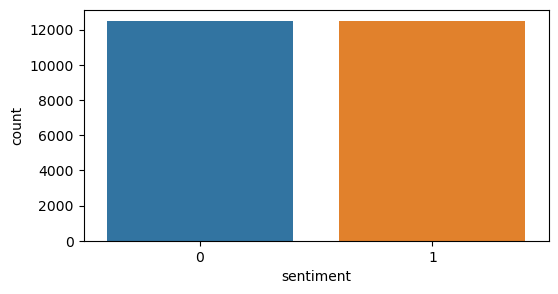

In [14]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(x = train_data['sentiment'])

In [15]:
print('긍정 리뷰 개수 : {}'.format(train_data['sentiment'].value_counts()[1]))
print('부정 리뷰 개수 : {}'.format(train_data['sentiment'].value_counts()[0]))

긍정 리뷰 개수 : 12500
부정 리뷰 개수 : 12500


### 각 리뷰의 단어 개수 분포

In [16]:
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Number of reviews')

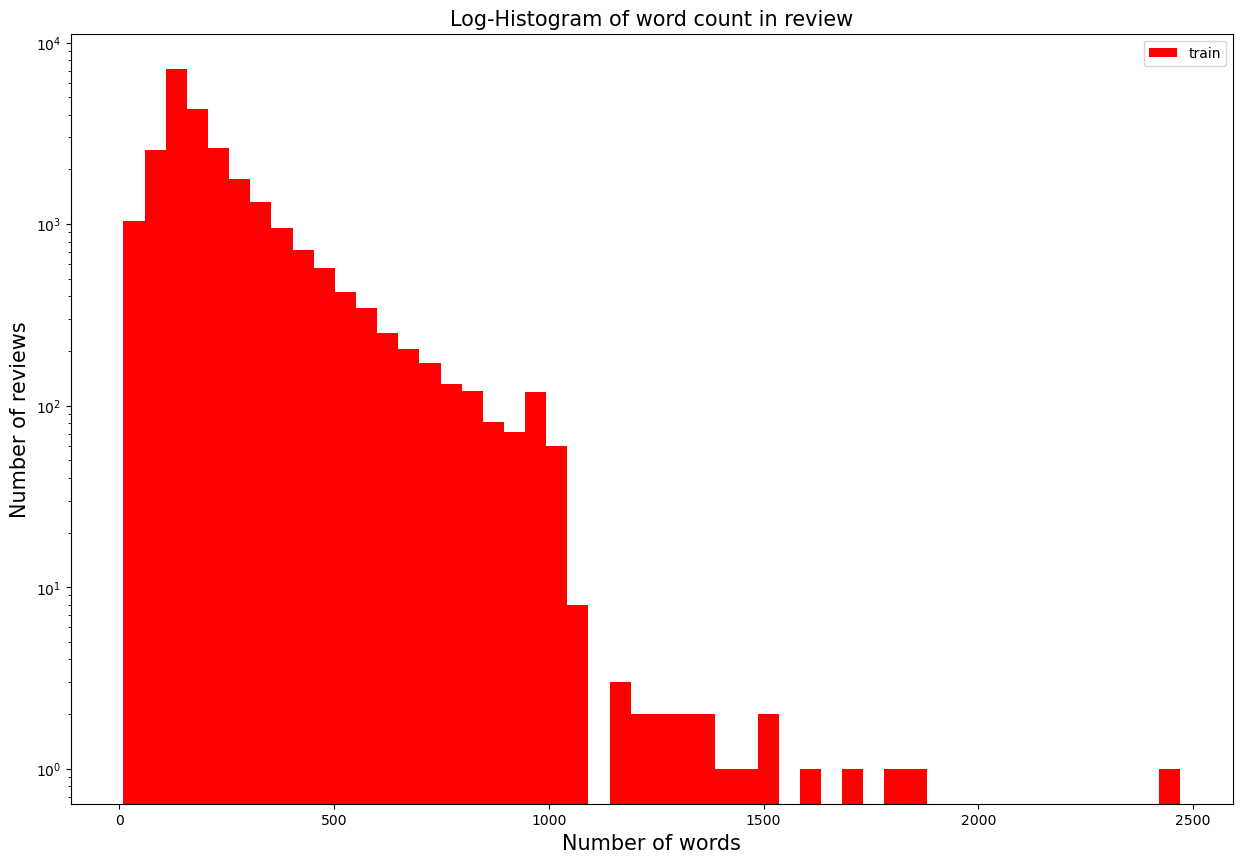

In [17]:
plt.figure(figsize=(15,10))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonpositive='clip')
plt.legend()
plt.xlabel('Number of words', fontsize = 15)
plt.ylabel('Number of reviews', fontsize=15)

In [18]:
print('단어 개수 최대값 : {}'.format(np.max(train_word_counts)))
# 단어 개수 최대값 : 2470
print('단어 개수 최소값 : {}'.format(np.min(train_word_counts)))
# 단어 개수 최소값 : 10
print('단어 개수 평균값 : {:.2f}'.format(np.mean(train_word_counts)))
# 단어 개수 평균값 : 233.79
print('단어 개수 표준편차 : {:.2f}'.format(np.std(train_word_counts)))
# 단어 개수 표준편차 : 173.74
print('단어 개수 중간값 : {}'.format(np.median(train_word_counts)))
# 단어 개수 중간값 : 174.0

print('단어 개수 제1사분위 : {}'.format(np.percentile(train_word_counts, 25)))
# 단어 개수 제1사분위 : 127.0
print('단어 개수 제3사분위 : {}'.format(np.percentile(train_word_counts, 75)))
# 단어 개수 제3사분위 : 284.0

단어 개수 최대값 : 2470
단어 개수 최소값 : 10
단어 개수 평균값 : 233.79
단어 개수 표준편차 : 173.74
단어 개수 중간값 : 174.0
단어 개수 제1사분위 : 127.0
단어 개수 제3사분위 : 284.0


### 특수문자 및 대,소문자 비율

In [19]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x))
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x))
capital_first = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x])))
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x])))

In [20]:
print('물음표가 있는 문장 : {:.2f}%'.format(qmarks * 100))
# 물음표가 있는 문장 : 29.55%
print('마침표가 있는 문장 : {:.2f}%'.format(fullstop * 100))
# 마침표가 있는 문장 : 99.69%
print('첫 글자가 대문자인 문장 : {:.2f}%'.format(capital_first * 100))
# 첫 글자가 대문자인 문장 : 0.00%
print('대문자가 있는 문장 : {:.2f}%'.format(capitals * 100))
# 대문자가 있는 문장 : 99.59%
print('숫자가 있는 문장 : {:.2f}%'.format(numbers * 100))
# 숫자가 있는 문장 : 56.66%

물음표가 있는 문장 : 29.55%
마침표가 있는 문장 : 99.69%
첫 글자가 대문자인 문장 : 99.59%
대문자가 있는 문장 : 99.59%
숫자가 있는 문장 : 56.66%


### 데이터 전처리

In [21]:
import re
import pandas
import numpy
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
# re : 문자열을 다룰때 사용하는 정규표현식 라이브러리
# pandas : 외부 행렬 데이터를 불러오거나 저장하거나, 데이터프레임이란 형식으로 행렬을 다룰때 사용
# numpy : 다차원 텐서 간 계산에 사용
# json : json 형태의 데이터를 다룰때 사용
# bs4 : 웹 크롤링 라이브러리
# nltk : 자연어 처리에 사용되는 라이브러리로, 불용어 제거 등 유용한 전처리 기능을 제공
# tensorflow : 머신러닝의 대표적 라이브러리 텐서플로. 여기서도 데이터 전처리 기능을 제공

In [22]:
DATA_IN_PATH = './data_in/'
train_data = pd.read_csv(DATA_IN_PATH+'labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)
print(train_data['review'][0]) # 첫번째 리뷰 데이터

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [23]:
review = train_data['review'][0]
review_text = BeautifulSoup(review, "html5lib").get_text() #HTML 태그 제거
review_text = re.sub("[^a-zA-Z]", " ", review_text) #영어 문제를 제외한 모든 데이터를 공백으로 변경
review_text

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    m

### 불용어 처리

In [25]:
stop_words = set(stopwords.words('english'))
review_text = review_text.lower()
words = review_text.split()
words = [w for w in words if not w in stop_words]

In [26]:
clean_review = ' '.join(words)
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [28]:
# 데이터 전처리 함수
import string


def preprocessing(review, remove_stopwords = False):
    # 불용어 제거는 선택이 가능하도록
    # 1.HTML 태그 제거
    review_text = BeautifulSoup(review, "html5lib").get_text()

    # 2.영어가 아닌 특수문자를 공백(" ")으로 바꾸기
    review_text = re.sub("[^a-zA-Z]", " ", review_text)

    # 3.대문자를 소문자로 바꾸고 공백 단위로 텍스트를 나누어 리스트화
    words = review_text.lower().split()

    if remove_stopwords:  # 4.불용어들을 제거
        # 영어 불용어 불러오기
        stops = set(stopwords.words('english'))

        # 불용어가 제거된 새로운 리스트 생성
        words = [w for w in words if not w in stops]
    
    # 5. 단어리스트를 스트링으로 변환
    clean_review = ' '.join(words)

    return clean_review

In [30]:
clean_train_reviews = []
for review in train_data['review']:
    clean_train_reviews.append(preprocessing(review, remove_stopwords=True))

c:\Users\TAEYONG\anaconda3\envs\study\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [31]:
clean_train_reviews

['stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate worki

In [32]:
clean_train_df = pd.DataFrame({'review': clean_train_reviews, 'sentiment': \
                                train_data['sentiment']})

In [33]:
clean_train_df

,review,sentiment
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1
...,...,...
24995,seems like consideration gone imdb reviews fil...,0
24996,believe made film completely unnecessary first...,0
24997,guy loser get girls needs build picked stronge...,0
24998,minute documentary bu uel made early one spain...,0


#### 토큰화

In [34]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

In [36]:
text_sequences[0]

[404,
 70,
 419,
 8815,
 506,
 2456,
 115,
 54,
 873,
 516,
 178,
 18686,
 178,
 11242,
 165,
 78,
 14,
 662,
 2457,
 117,
 92,
 10,
 499,
 4074,
 165,
 22,
 210,
 581,
 2333,
 1194,
 11242,
 71,
 4826,
 71,
 635,
 2,
 253,
 70,
 11,
 302,
 1663,
 486,
 1144,
 3265,
 8815,
 411,
 793,
 3342,
 17,
 441,
 600,
 1500,
 15,
 4424,
 1851,
 998,
 146,
 342,
 1442,
 743,
 2424,
 4,
 8815,
 418,
 70,
 637,
 69,
 237,
 94,
 541,
 8815,
 26055,
 26056,
 120,
 1,
 8815,
 323,
 8,
 47,
 20,
 323,
 167,
 10,
 207,
 633,
 635,
 2,
 116,
 291,
 382,
 121,
 15535,
 3315,
 1501,
 574,
 734,
 10013,
 923,
 11578,
 822,
 1239,
 1408,
 360,
 8815,
 221,
 15,
 576,
 8815,
 22224,
 2274,
 13426,
 734,
 10013,
 27,
 28606,
 340,
 16,
 41,
 18687,
 1500,
 388,
 11243,
 165,
 3962,
 8815,
 115,
 627,
 499,
 79,
 4,
 8815,
 1430,
 380,
 2163,
 114,
 1919,
 2503,
 574,
 17,
 60,
 100,
 4875,
 5100,
 260,
 1268,
 26057,
 15,
 574,
 493,
 744,
 637,
 631,
 3,
 394,
 164,
 446,
 114,
 615,
 3266,
 1160,
 684,
 48,


In [38]:
word_vocab = tokenizer.word_index
word_vocab

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'story': 9,
 'really': 10,
 'see': 11,
 'well': 12,
 'much': 13,
 'get': 14,
 'bad': 15,
 'people': 16,
 'also': 17,
 'first': 18,
 'great': 19,
 'made': 20,
 'way': 21,
 'make': 22,
 'could': 23,
 'movies': 24,
 'think': 25,
 'characters': 26,
 'character': 27,
 'watch': 28,
 'two': 29,
 'films': 30,
 'seen': 31,
 'many': 32,
 'life': 33,
 'plot': 34,
 'acting': 35,
 'never': 36,
 'love': 37,
 'little': 38,
 'best': 39,
 'show': 40,
 'know': 41,
 'ever': 42,
 'man': 43,
 'better': 44,
 'end': 45,
 'still': 46,
 'say': 47,
 'scene': 48,
 'scenes': 49,
 'go': 50,
 'something': 51,
 'back': 52,
 'real': 53,
 'watching': 54,
 'though': 55,
 'thing': 56,
 'old': 57,
 'years': 58,
 'actors': 59,
 'director': 60,
 'work': 61,
 'another': 62,
 'new': 63,
 'nothing': 64,
 'funny': 65,
 'actually': 66,
 'makes': 67,
 'look': 68,
 'find': 69,
 'going': 70,
 'part': 71,
 'lot': 72,
 'every': 73,
 'wo

In [39]:
word_vocab["<PAD>"]=0

In [40]:
print('전체 단어 개수: ', len(word_vocab))

전체 단어 개수:  74066


In [49]:
data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)# + 1

In [50]:
MAX_SEQUENCE_LENGTH = 174    # 문장 최대 길이

train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, \
                            padding='post')
                        
print('Shape of train data: ', train_inputs.shape)

Shape of train data:  (25000, 174)


In [51]:
train_labels = np.array(train_data['sentiment'])
print('Shape of label tensor: ', train_labels.shape)

Shape of label tensor:  (25000,)


![alt text](./img1.png)

### 저장

In [52]:
TRAIN_INPUT_DATA = 'train_input.npy'  # 벡터화된 데이터(numpy file)
TRAIN_LABEL_DATA = 'train_label.npy'  # 정답 레이블 (numpy file)
TRAIN_CLEAN_DATA = 'train_clean.csv'  # 정제된 텍스트 데이터 (csv file)
DATA_CONFIGS = 'data_configs.json'    # 정답 레이블 (json file)

In [53]:
import os
# 저장하려는 디렉터리가 존재하지 않을시 생성
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

In [54]:
# 전처리된 데이처를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)

# 정제된 텍스트를 csv 형태로 저장
clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index=False)

# 데이터 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'),
        ensure_ascii=False)   # ensure_ascii=False : 유니코드가 포함됨

In [55]:
test_data = pd.read_csv(DATA_IN_PATH + 'testData.tsv', header=0, \
                        delimiter="\t", quoting=3)

# Mission
# 1.preprocessing
# 2.DataFrame 만들기
# 3.texts_to_sequences
# 4.pad_sequences

TEST_INPUT_DATA = 'test_input.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID_DATA = 'test_id.npy'

In [57]:
# 1.preprocessing
clean_test_reviews =[]
for review in test_data['review']:
    clean_test_reviews.append(preprocessing(review, remove_stopwords=True))

c:\Users\TAEYONG\anaconda3\envs\study\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [61]:
# 2.DataFrame 만들기
clean_test_df = pd.DataFrame({'review':clean_test_reviews, 'id': test_data['id']})
clean_test_df

test_id = np.array(test_data['id'])

In [62]:
# 3.texts_to_sequences
text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences, \
                            maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [63]:
TEST_INPUT_DATA = 'test_input.npy'  # pad_sequences 처리한것
TEST_CLEAN_DATA = 'test_clean.csv'  # review + id
TEST_ID_DATA = 'test_id.npy'        # id 값

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb'), test_id)
clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index = False)

### exercise

In [29]:
import pandas as pd

df = pd.read_csv("a.csv", delimiter='\t')
df

,c0,c1,c2,c3
0,0,1,3,ddd
1,1,2,3,ooo
2,2,2,2,ddd


In [24]:
import pandas as pd
df = pd.read_csv("a.csv", delimiter='\t', quoting=3)
df

,c0,c1,c2,c3
0,0,1,3,"""ddd"""
1,1,2,3,"""ooo"""
2,2,2,2,"""ddd"""
